## NetworkX
* https://networkx.org/

In [2]:
# !pip install networkx[default]

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [4]:
import matplotlib.font_manager as fm
import platform

font_path = "C:/Windows/Fonts/malgun.ttf" # 맑은 고딕 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

In [5]:
df_sample = pd.read_csv('./data/network_data.csv')
df_sample.head()

,고객ID,고객이름,동반인ID,주문메뉴
0,C0116,고객116,NaN,"['쫄면', '칼국수']"
1,C0169,고객169,NaN,"['순두부찌개', '된장찌개', '불고기']"
2,C0086,고객86,C0153,['쫄면']
3,C0104,고객104,C0163,"['순두부찌개', '된장찌개', '비빔밥']"
4,C0126,고객126,NaN,"['비빔밥', '김치찌개']"


In [6]:
# 고객id : 고객 이름 매핑 딕셔너리 만들기
customer_dict = dict(zip(df_sample['고객ID'], df_sample['고객이름']))
customer_dict

{'C0116': '고객116',
 'C0169': '고객169',
 'C0086': '고객86',
 'C0104': '고객104',
 'C0126': '고객126',
 'C0184': '고객184',
 'C0181': '고객181',
 'C0154': '고객154',
 'C0081': '고객81',
 'C0199': '고객199',
 'C0149': '고객149',
 'C0058': '고객58',
 'C0042': '고객42',
 'C0187': '고객187',
 'C0176': '고객176',
 'C0107': '고객107',
 'C0177': '고객177',
 'C0027': '고객27',
 'C0144': '고객144',
 'C0072': '고객72',
 'C0123': '고객123',
 'C0132': '고객132',
 'C0005': '고객5',
 'C0140': '고객140',
 'C0048': '고객48',
 'C0049': '고객49',
 'C0114': '고객114',
 'C0138': '고객138',
 'C0045': '고객45',
 'C0031': '고객31',
 'C0078': '고객78',
 'C0164': '고객164',
 'C0047': '고객47',
 'C0028': '고객28',
 'C0089': '고객89',
 'C0119': '고객119',
 'C0170': '고객170',
 'C0150': '고객150',
 'C0004': '고객4',
 'C0093': '고객93',
 'C0069': '고객69',
 'C0180': '고객180',
 'C0143': '고객143',
 'C0021': '고객21',
 'C0030': '고객30',
 'C0200': '고객200',
 'C0139': '고객139',
 'C0092': '고객92',
 'C0159': '고객159',
 'C0088': '고객88',
 'C0195': '고객195',
 'C0076': '고객76',
 'C0053': '고객53',
 'C0033': '고객33',
 

In [7]:
# 고객 네트워크 그래프 생성
G = nx.Graph()

for _, row in df_sample.iterrows(): # _ : idx를 받지 않고 무시하겠다
    cust_id = row['고객ID']
    cust_name = row['고객이름']
    cust_label = f'{cust_name} ({cust_id})'
    
    companion_id = row['동반인ID']
    if pd.notnull(companion_id):
        companion_name = customer_dict.get(companion_id, companion_id)
        companion_label = f'{companion_name} ({companion_id})'
        
        G.add_node(cust_label)
        G.add_node(companion_label)
        G.add_edge(cust_label, companion_label)
        
# 중심성 분석
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

In [8]:
degree_centrality

{'고객86 (C0086)': 0.020618556701030927,
 '고객153 (C0153)': 0.041237113402061855,
 '고객104 (C0104)': 0.02577319587628866,
 '고객163 (C0163)': 0.041237113402061855,
 '고객184 (C0184)': 0.02577319587628866,
 '고객45 (C0045)': 0.02577319587628866,
 '고객126 (C0126)': 0.010309278350515464,
 '고객38 (C0038)': 0.015463917525773196,
 '고객108 (C0108)': 0.010309278350515464,
 '고객199 (C0199)': 0.030927835051546393,
 '고객100 (C0100)': 0.041237113402061855,
 '고객149 (C0149)': 0.02577319587628866,
 '고객42 (C0042)': 0.02577319587628866,
 '고객140 (C0140)': 0.02577319587628866,
 '고객144 (C0144)': 0.015463917525773196,
 '고객159 (C0159)': 0.015463917525773196,
 '고객132 (C0132)': 0.010309278350515464,
 '고객145 (C0145)': 0.030927835051546393,
 '고객114 (C0114)': 0.041237113402061855,
 '고객116 (C0116)': 0.030927835051546393,
 '고객24 (C0024)': 0.03608247422680412,
 '고객31 (C0031)': 0.020618556701030927,
 '고객164 (C0164)': 0.010309278350515464,
 '고객99 (C0099)': 0.030927835051546393,
 '고객47 (C0047)': 0.020618556701030927,
 '고객50 (C0050)'

In [9]:
# 상위 5명 정리
top_k = 10
top_degree = sorted(degree_centrality.items(), key=lambda x : x[1], reverse=True)[:top_k]

In [10]:
top_degree

[('고객106 (C0106)', 0.05154639175257732),
 ('고객133 (C0133)', 0.04639175257731959),
 ('고객153 (C0153)', 0.041237113402061855),
 ('고객163 (C0163)', 0.041237113402061855),
 ('고객100 (C0100)', 0.041237113402061855),
 ('고객114 (C0114)', 0.041237113402061855),
 ('고객195 (C0195)', 0.041237113402061855),
 ('고객24 (C0024)', 0.03608247422680412),
 ('고객170 (C0170)', 0.03608247422680412),
 ('고객183 (C0183)', 0.03608247422680412)]

In [11]:
result = []
for node, degree in top_degree:
    result.append({
        '고객이름(고객ID)' : node,
        '연결중심성(Degree)' : round(degree, 4),
        '매개중심성(Betweenness)' : round(betweenness_centrality.get(node, 0), 4),
        '근접중심성(Closeness)' : round(closeness_centrality.get(node, 0), 4)
    })
    
df_result = pd.DataFrame(result)
df_result

,고객이름(고객ID),연결중심성(Degree),매개중심성(Betweenness),근접중심성(Closeness)
0,고객106 (C0106),0.0515,0.0713,0.3050
1,고객133 (C0133),0.0464,0.0645,0.3065
2,고객153 (C0153),0.0412,0.0440,0.2840
3,고객163 (C0163),0.0412,0.0366,0.2904
4,고객100 (C0100),0.0412,0.0531,0.2953
5,고객114 (C0114),0.0412,0.0517,0.2900
6,고객195 (C0195),0.0412,0.0707,0.3031
7,고객24 (C0024),0.0361,0.0412,0.2866
8,고객170 (C0170),0.0361,0.0331,0.2771
9,고객183 (C0183),0.0361,0.0375,0.2870


### 연결중심성 Degree
* 직접 연결된 고객 수 비율
* 동반 방문 횟수 혹은 연결된 고객이 많을수록 높음
* 관계의 중심 느낌 ex. 인싸 
* 가장 친구들을 데리고 다니는 사람
### 매개중심성 Betweenness
* 다른 고객 사이의 중개 역할 비율
* 다양한 고객 집단을 이어주는 다리 역할을 할수록 높음
### 근접중심성 Closeness
* 전체 고객들과의 거리 평균의 역수
* 네트워크 전체와 가깝게 연결되어 있을수록 높음

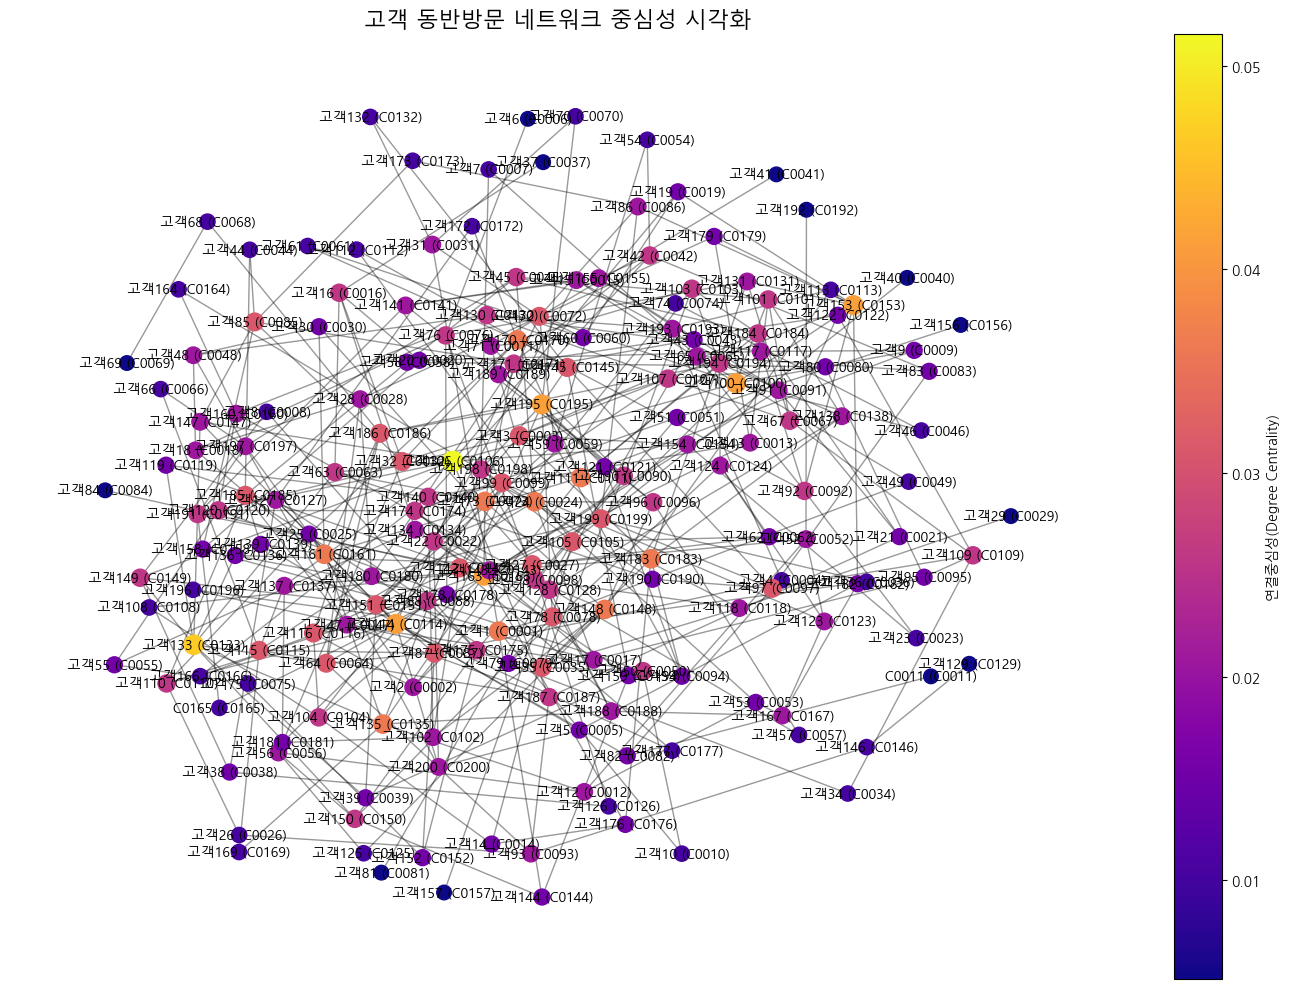

In [12]:
plt.rcParams['axes.unicode_minus'] = False

# 노드 속성 설정
node_colors = [degree_centrality.get(node,0) for node in G.nodes]
node_sizes = [2000 * degree_centrality.get(node, 0) + 100 for node in G.nodes]

# 노드 위치 계산
pos = nx.spring_layout(G, seed=42, k=0.5) # k는 노드간의 평균거리 (작으면 촘촘하게, 크면 넓게)

plt.figure(figsize=(14,10))
nodes = nx.draw_networkx_nodes(
        G, pos,
        node_color=node_colors,
        node_size=node_sizes,
        cmap=plt.cm.plasma)

# 엣지와 레이블
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=10, font_family=font_prop.get_name())
plt.colorbar(nodes, label='연결중심성(Degree Centrality)')
plt.title('고객 동반방문 네트워크 중심성 시각화', fontproperties=font_prop, fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()